In [3]:
import pandas as pd
df = pd.read_csv("C:\\Users\\moham\\Desktop\\EastWestAirliness.csv")
df

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

In [5]:
#Data prepocessing
#  1.Preprocess the dataset to handle missing values, 

# Check for missing values
print(df.isnull().sum())

# Handle missing values (replace with mean for numerical, mode for categorical)
for column in df.columns:
  if df[column].dtype == 'object':
    df[column].fillna(df[column].mode()[0], inplace=True)
  else:
    df[column].fillna(df[column].mean(), inplace=True)

# Verify missing values are handled
print(df.isnull().sum())

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64
ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


C:\Users\moham\AppData\Local\Temp\ipykernel_15404\25202701.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


In [7]:
#  remove outliers, and scale the features if necessary.

import pandas as pd
from sklearn.preprocessing import StandardScaler

# Remove outliers using IQR method (adjust as needed)
for column in df.columns:
  if pd.api.types.is_numeric_dtype(df[column]):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]

# Scale the features using StandardScaler
scaler = StandardScaler()
for column in df.columns:
  if pd.api.types.is_numeric_dtype(df[column]):
    df[column] = scaler.fit_transform(df[[column]])

# Print the updated DataFrame
print(df)

           ID#   Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
0    -1.892083 -0.351730         0.0  -0.571271        0.0        0.0   
1    -1.891230 -0.573510         0.0  -0.571271        0.0        0.0   
2    -1.890377 -0.022485         0.0  -0.571271        0.0        0.0   
3    -1.889524 -0.684862         0.0  -0.571271        0.0        0.0   
5    -1.887818 -0.643890         0.0  -0.571271        0.0        0.0   
...        ...       ...         ...        ...        ...        ...   
3990  1.530211 -0.771242         0.0  -0.571271        0.0        0.0   
3991  1.531064 -0.077612         0.0   1.522607        0.0        0.0   
3992  1.531917 -0.774457         0.0  -0.571271        0.0        0.0   
3993  1.532770 -0.954070         0.0  -0.571271        0.0        0.0   
3998  1.537035 -0.977945         0.0  -0.571271        0.0        0.0   

      Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
0       -0.663819    -0.922006                0.0    

                ID#       Balance  Qual_miles     cc1_miles  cc2_miles  \
count  1.785000e+03  1.785000e+03      1785.0  1.785000e+03     1785.0   
mean   6.369011e-17 -3.184505e-17         0.0 -7.961263e-17        0.0   
std    1.000280e+00  1.000280e+00         0.0  1.000280e+00        0.0   
min   -1.892083e+00 -1.051415e+00         0.0 -5.712709e-01        0.0   
25%   -8.573766e-01 -7.317403e-01         0.0 -5.712709e-01        0.0   
50%    8.776349e-02 -3.437295e-01         0.0 -5.712709e-01        0.0   
75%    9.143346e-01  4.371517e-01         0.0  4.756681e-01        0.0   
max    1.537035e+00  3.854582e+00         0.0  2.569546e+00        0.0   

       cc3_miles   Bonus_miles   Bonus_trans  Flight_miles_12mo  \
count     1785.0  1.785000e+03  1.785000e+03             1785.0   
mean         0.0  1.592253e-17 -3.980632e-17                0.0   
std          0.0  1.000280e+00  1.000280e+00                0.0   
min          0.0 -6.804208e-01 -1.059947e+00                0.0  

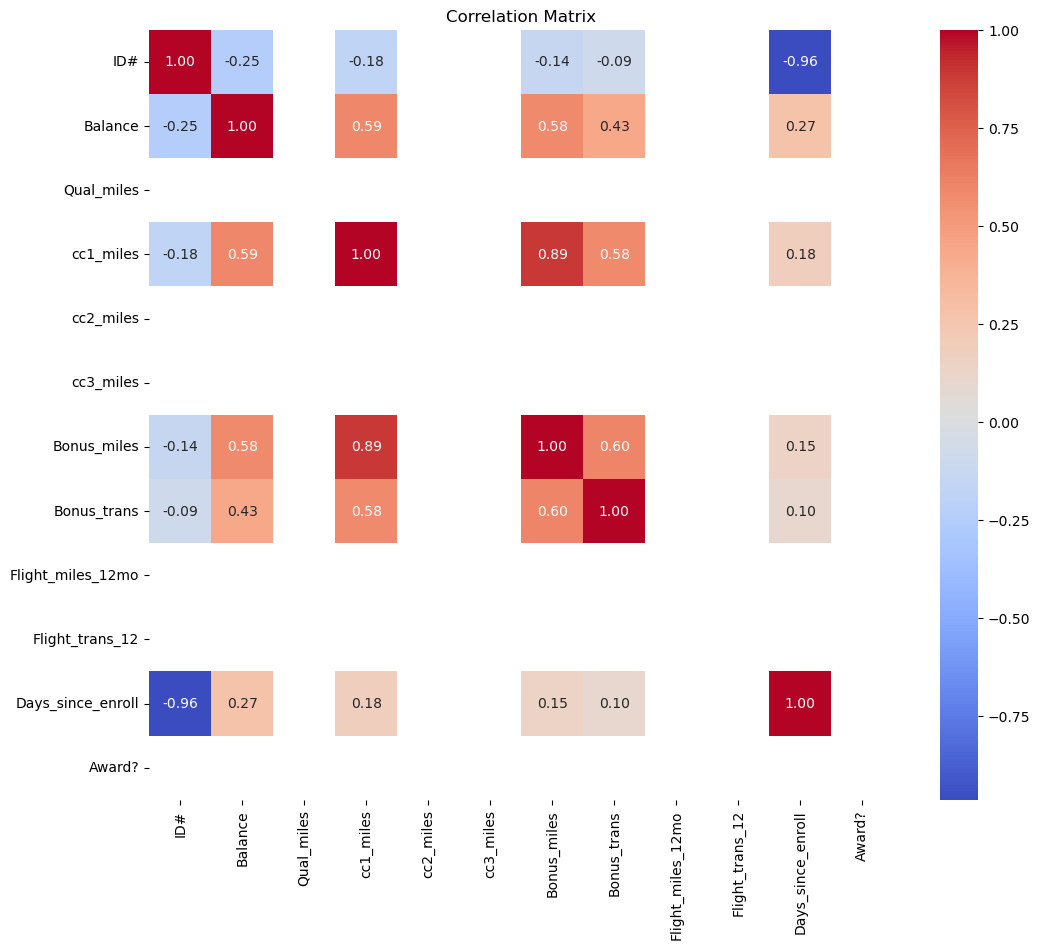

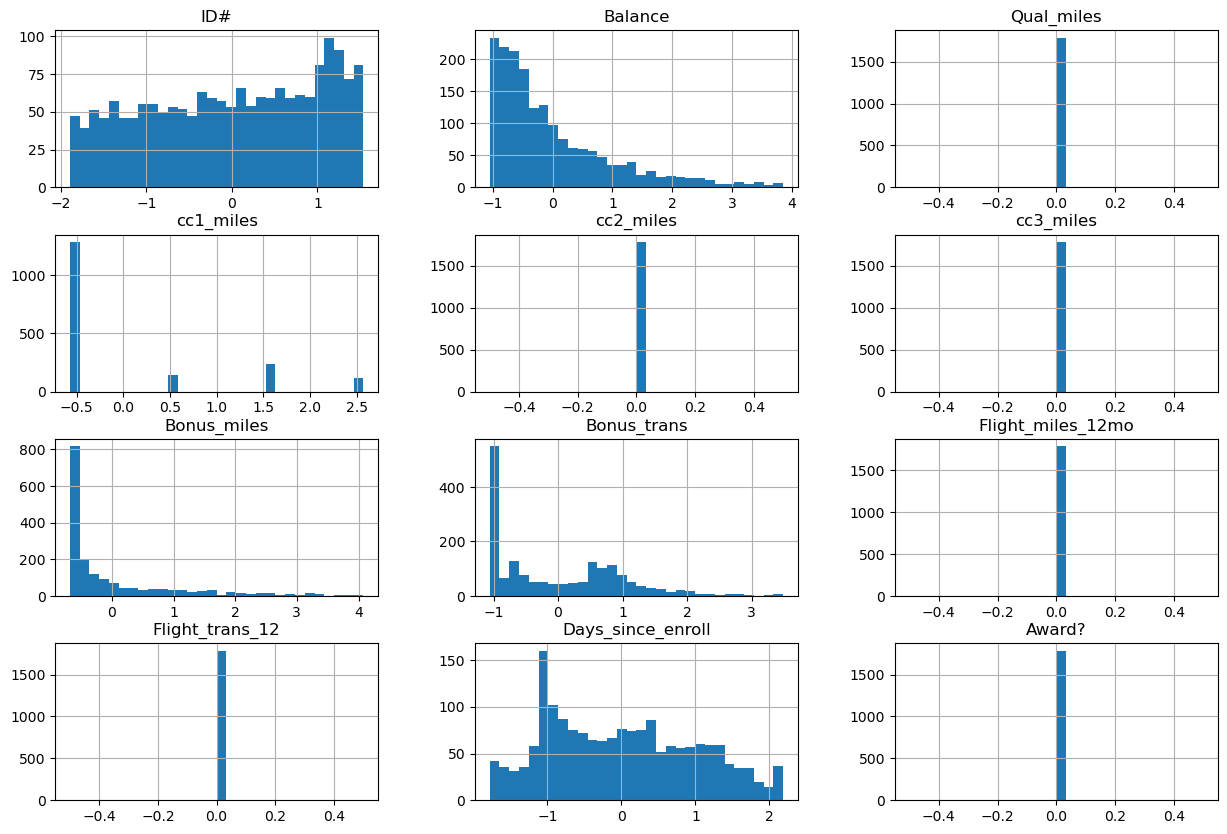

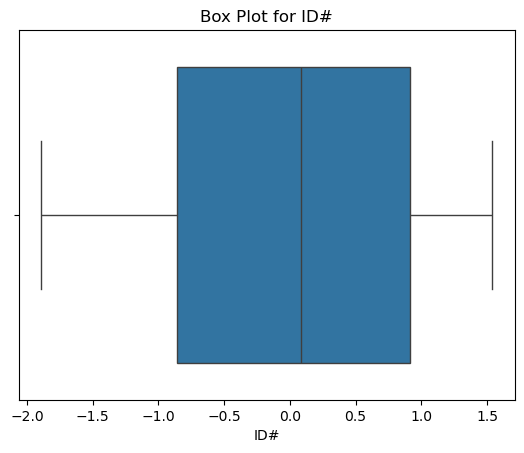

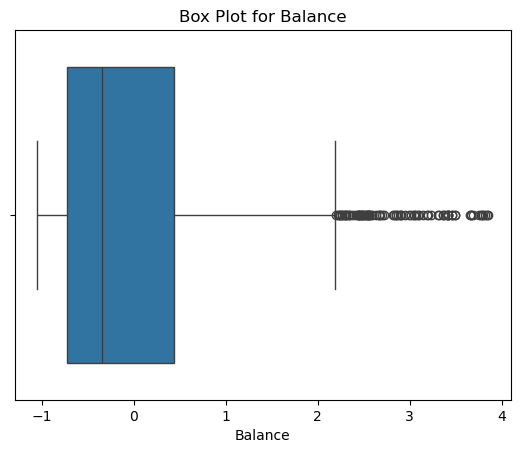

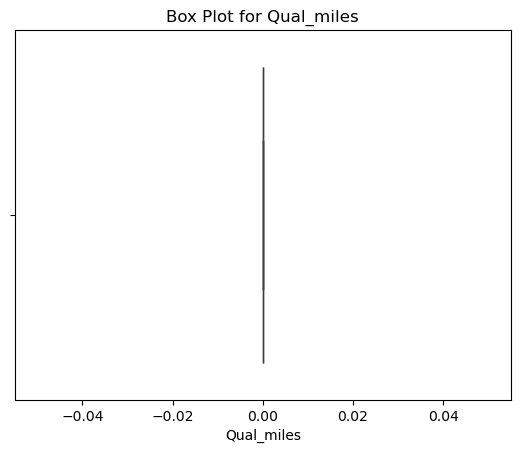

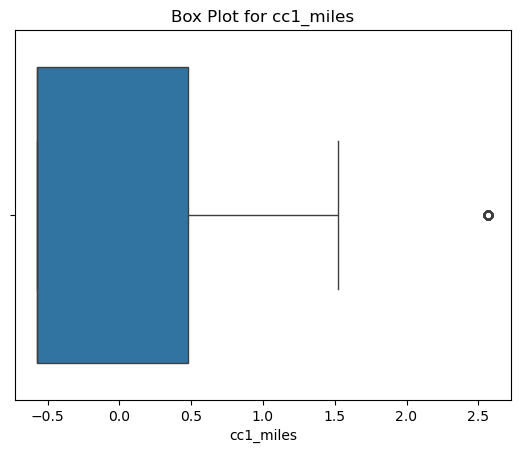

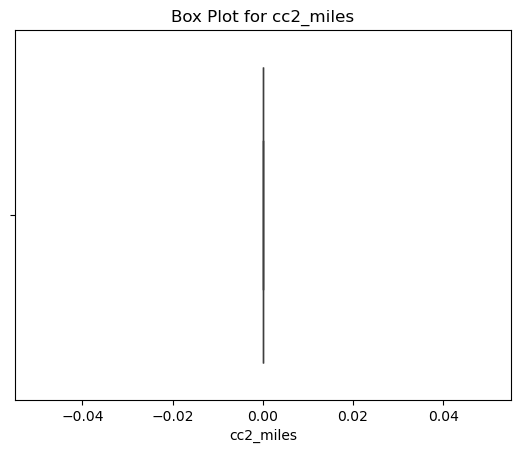

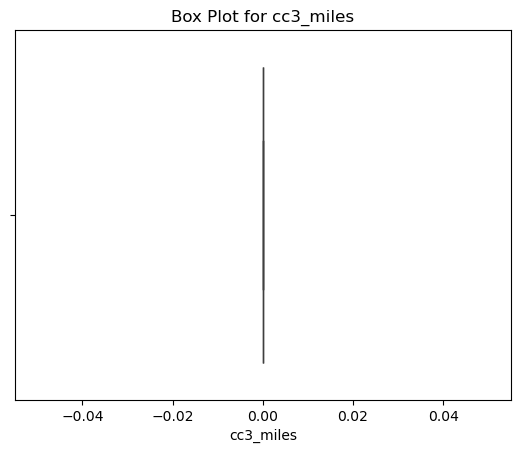

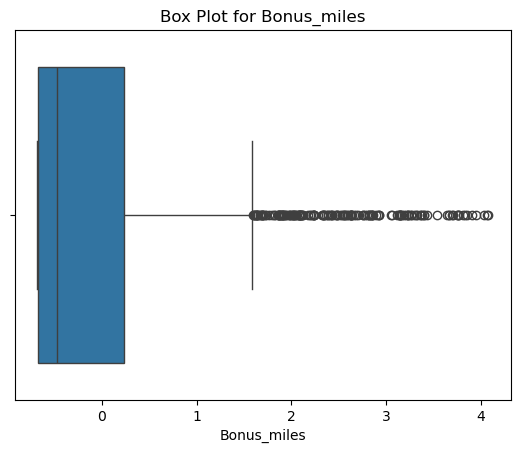

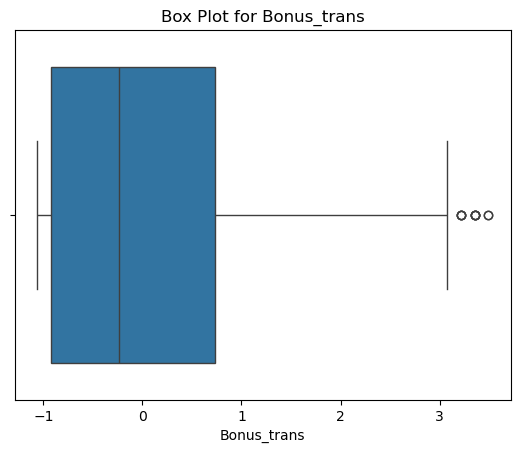

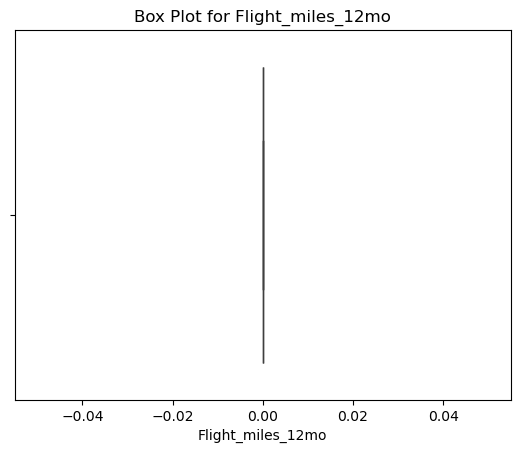

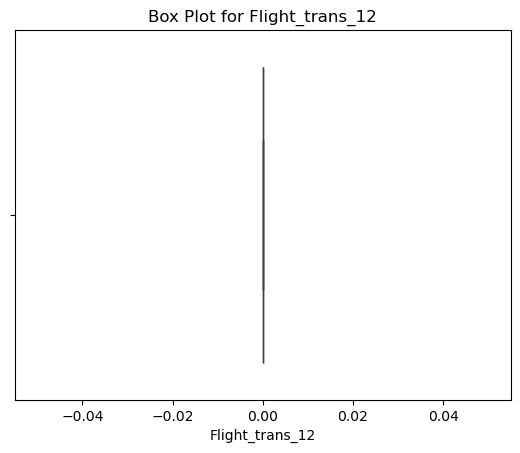

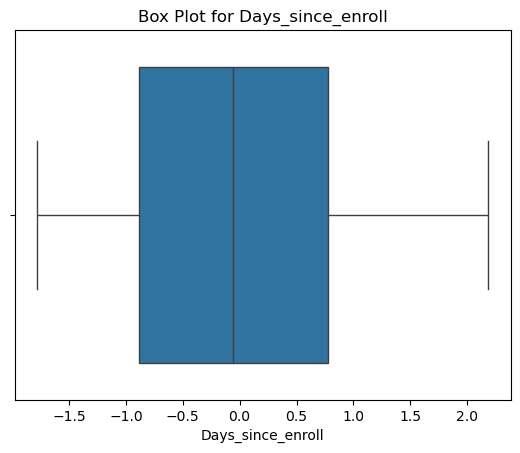

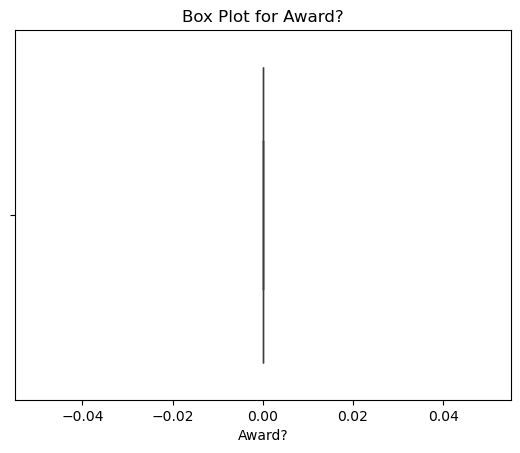

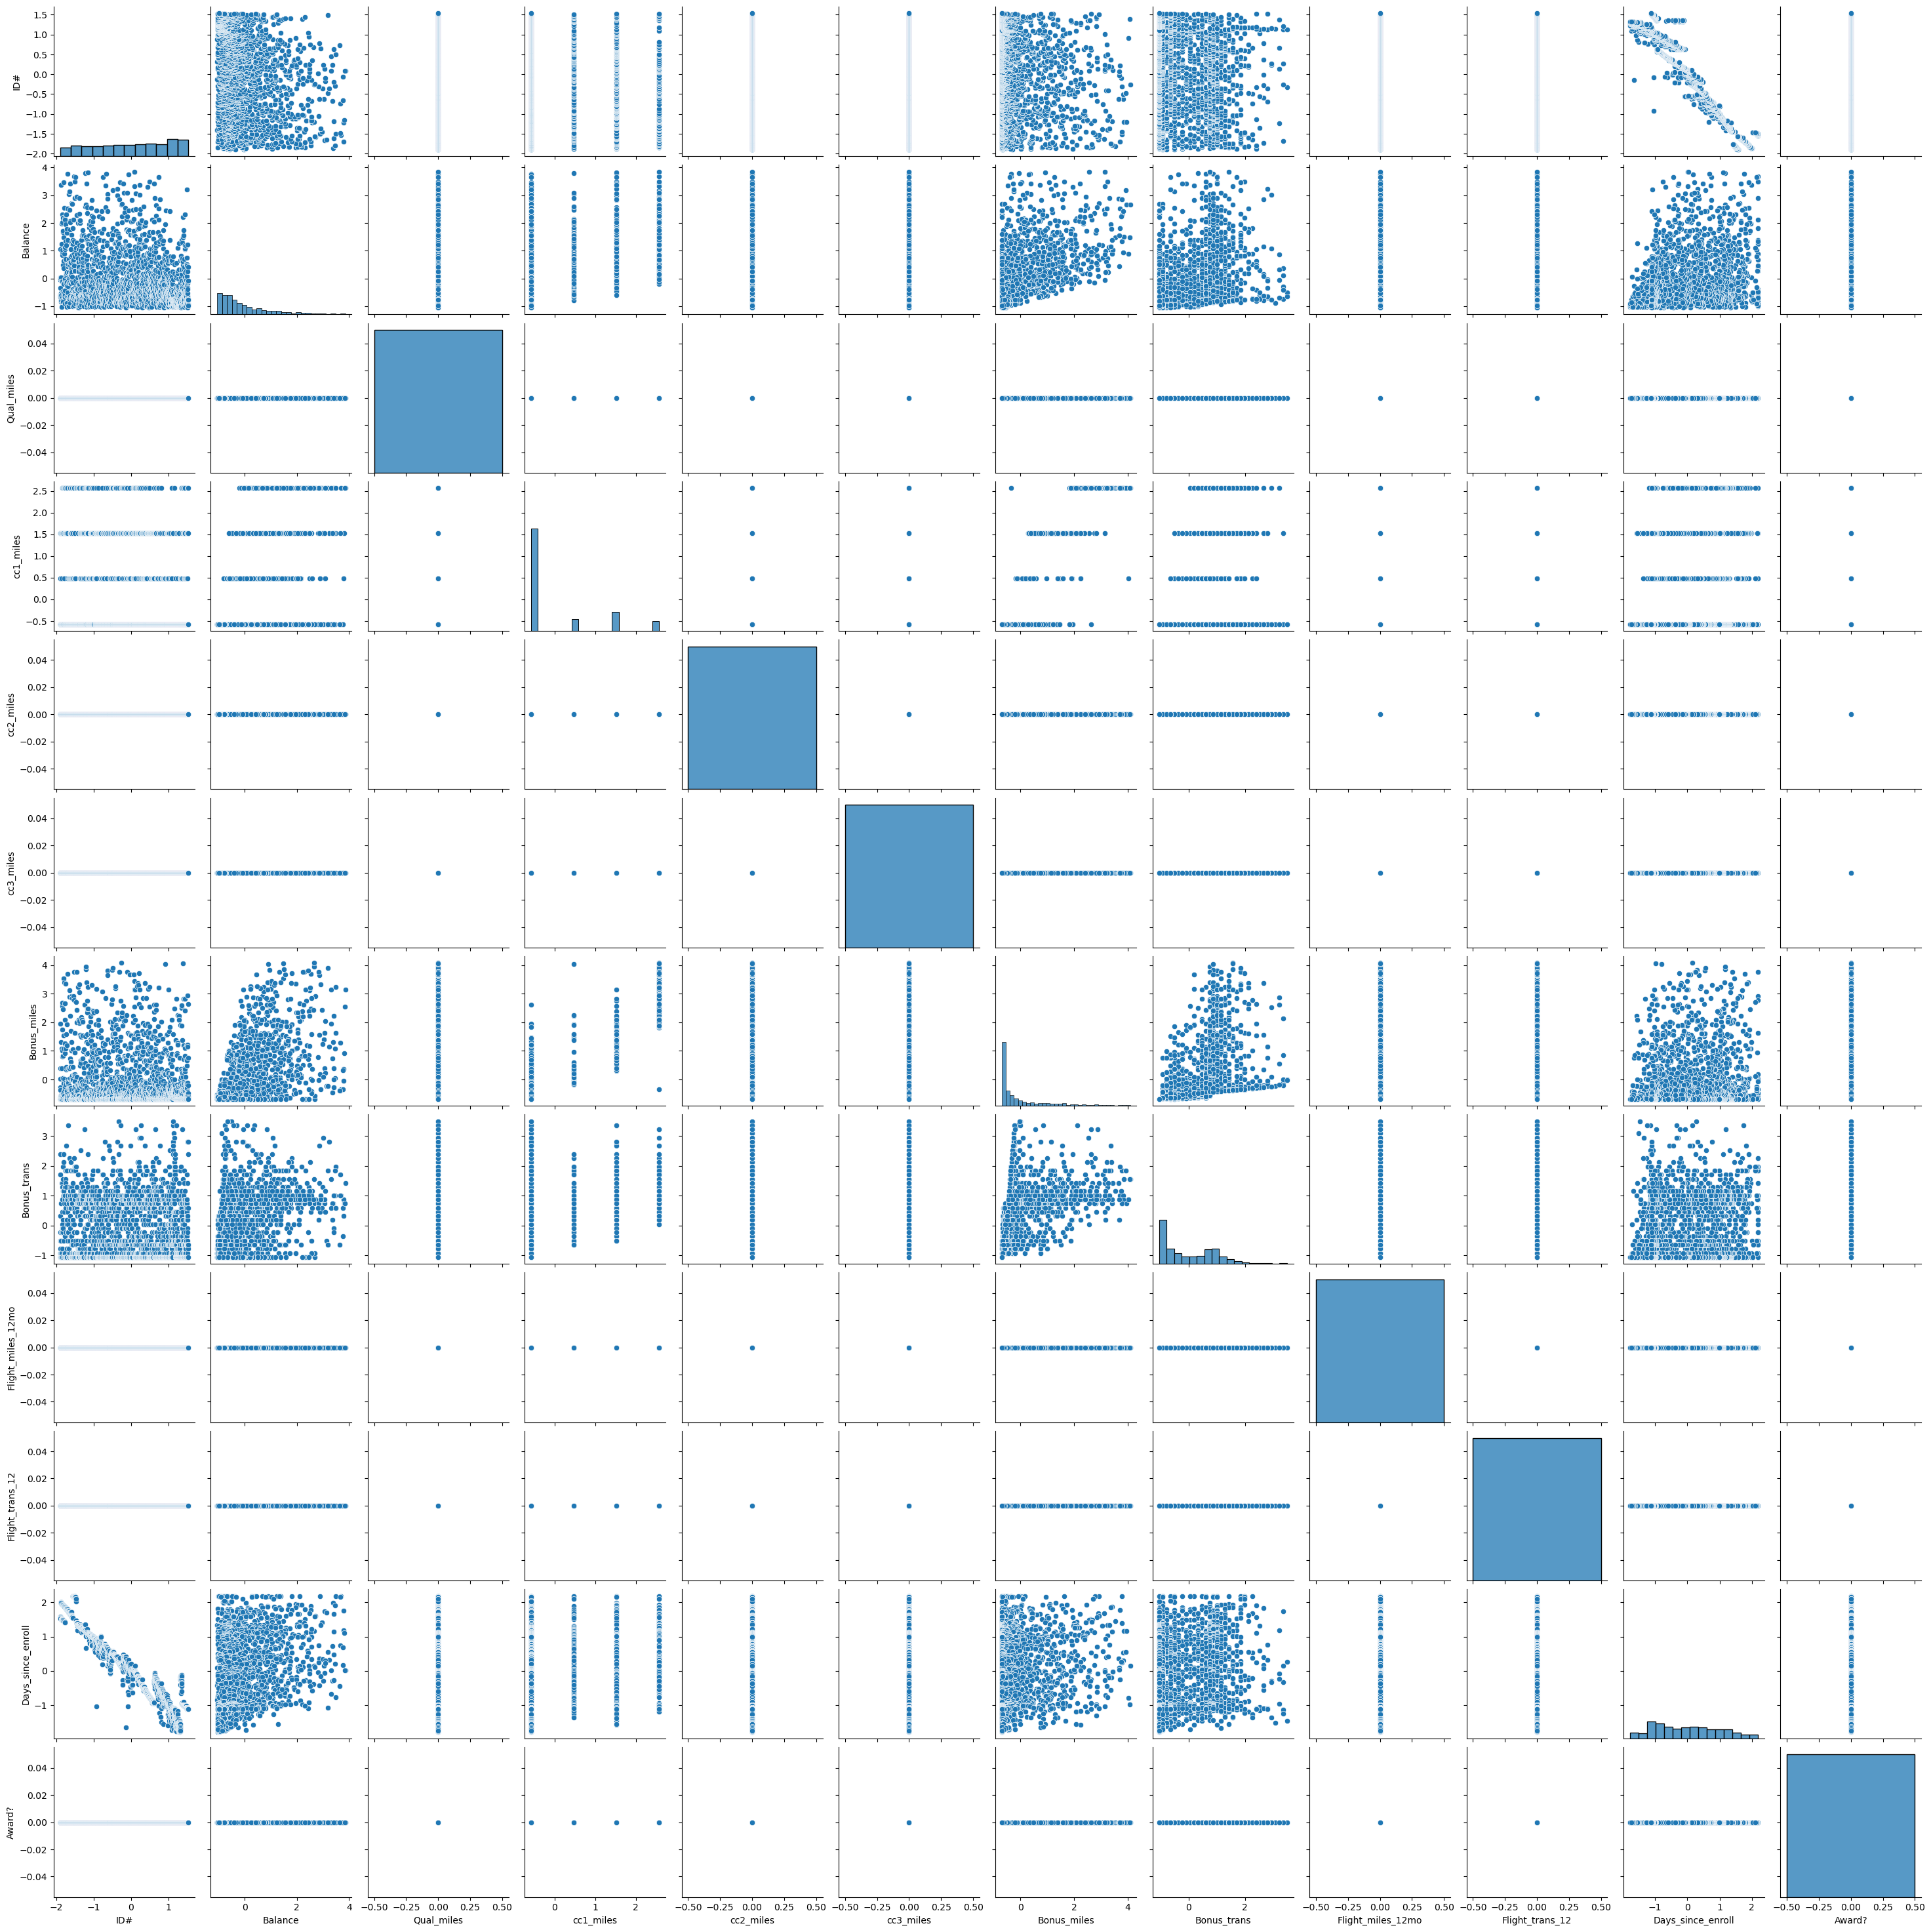

In [9]:
# 2 .Perform exploratory data analysis (EDA) 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics
print(df.describe())

# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Histograms for numerical features
df.hist(bins=30, figsize=(15, 10))
plt.show()

# Box plots for numerical features to identify outliers
for column in df.columns:
  if pd.api.types.is_numeric_dtype(df[column]):
    plt.figure()
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot for {column}')
    plt.show()

# Pair plot to visualize relationships between features
sns.pairplot(df)
plt.show()

# Analyze categorical features (frequency distribution, bar plots)
for column in df.columns:
  if df[column].dtype == 'object':
    print(df[column].value_counts())
    plt.figure()
    sns.countplot(x=df[column])
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45, ha='right')
    plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

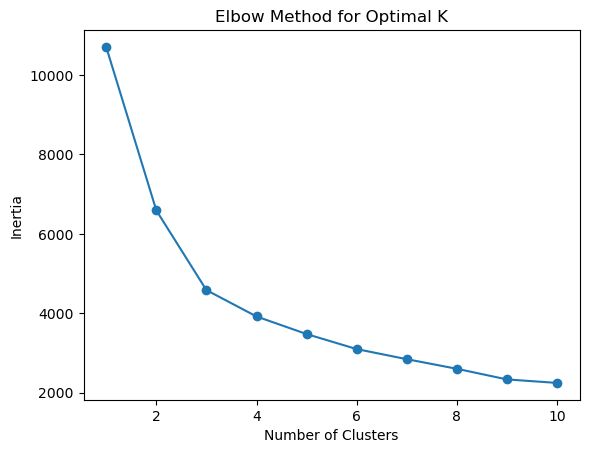

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


Cluster 0:
              ID#     Balance  Qual_miles   cc1_miles  cc2_miles  cc3_miles  \
count  405.000000  405.000000       405.0  405.000000      405.0      405.0   
mean    -0.325896    1.141102         0.0    1.669954        0.0        0.0   
std      0.912584    1.029834         0.0    0.716038        0.0        0.0   
min     -1.886965   -0.592127         0.0   -0.571271        0.0        0.0   
25%     -1.085132    0.321389         0.0    1.522607        0.0        0.0   
50%     -0.343862    0.963230         0.0    1.522607        0.0        0.0   
75%      0.414468    1.765894         0.0    2.569546        0.0        0.0   
max      1.531064    3.854582         0.0    2.569546        0.0        0.0   

       Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count   405.000000   405.000000              405.0            405.0   
mean      1.505651     1.057881                0.0              0.0   
std       1.017903     0.589586                0.0              

In [11]:
#  to gain insights into the distribution of data and identify potential clusters.

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Determine the optimal number of clusters using the Elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Apply K-Means clustering with the optimal number of clusters (e.g., 3 based on the elbow method)
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(df)

# Analyze cluster characteristics
for cluster in range(3):
  print(f"Cluster {cluster}:")
  print(df[df['cluster'] == cluster].describe())

# Check for the existence of 'ActualElapsedTime' and 'Distance' columns
if 'ActualElapsedTime' in df.columns and 'Distance' in df.columns:
    # Visualize clusters using scatter plots (for two selected features)
    plt.figure(figsize=(8, 6))
    plt.scatter(df['ActualElapsedTime'], df['Distance'], c=df['cluster'], cmap='viridis')
    plt.xlabel('ActualElapsedTime')
    plt.ylabel('Distance')
    plt.title('Clusters based on ActualElapsedTime and Distance')
    plt.show()
else:
    print("Columns 'ActualElapsedTime' or 'Distance' not found in the DataFrame.")


# Calculate silhouette score
silhouette_avg = silhouette_score(df, df['cluster'])
print(f"Silhouette Score: {silhouette_avg}")

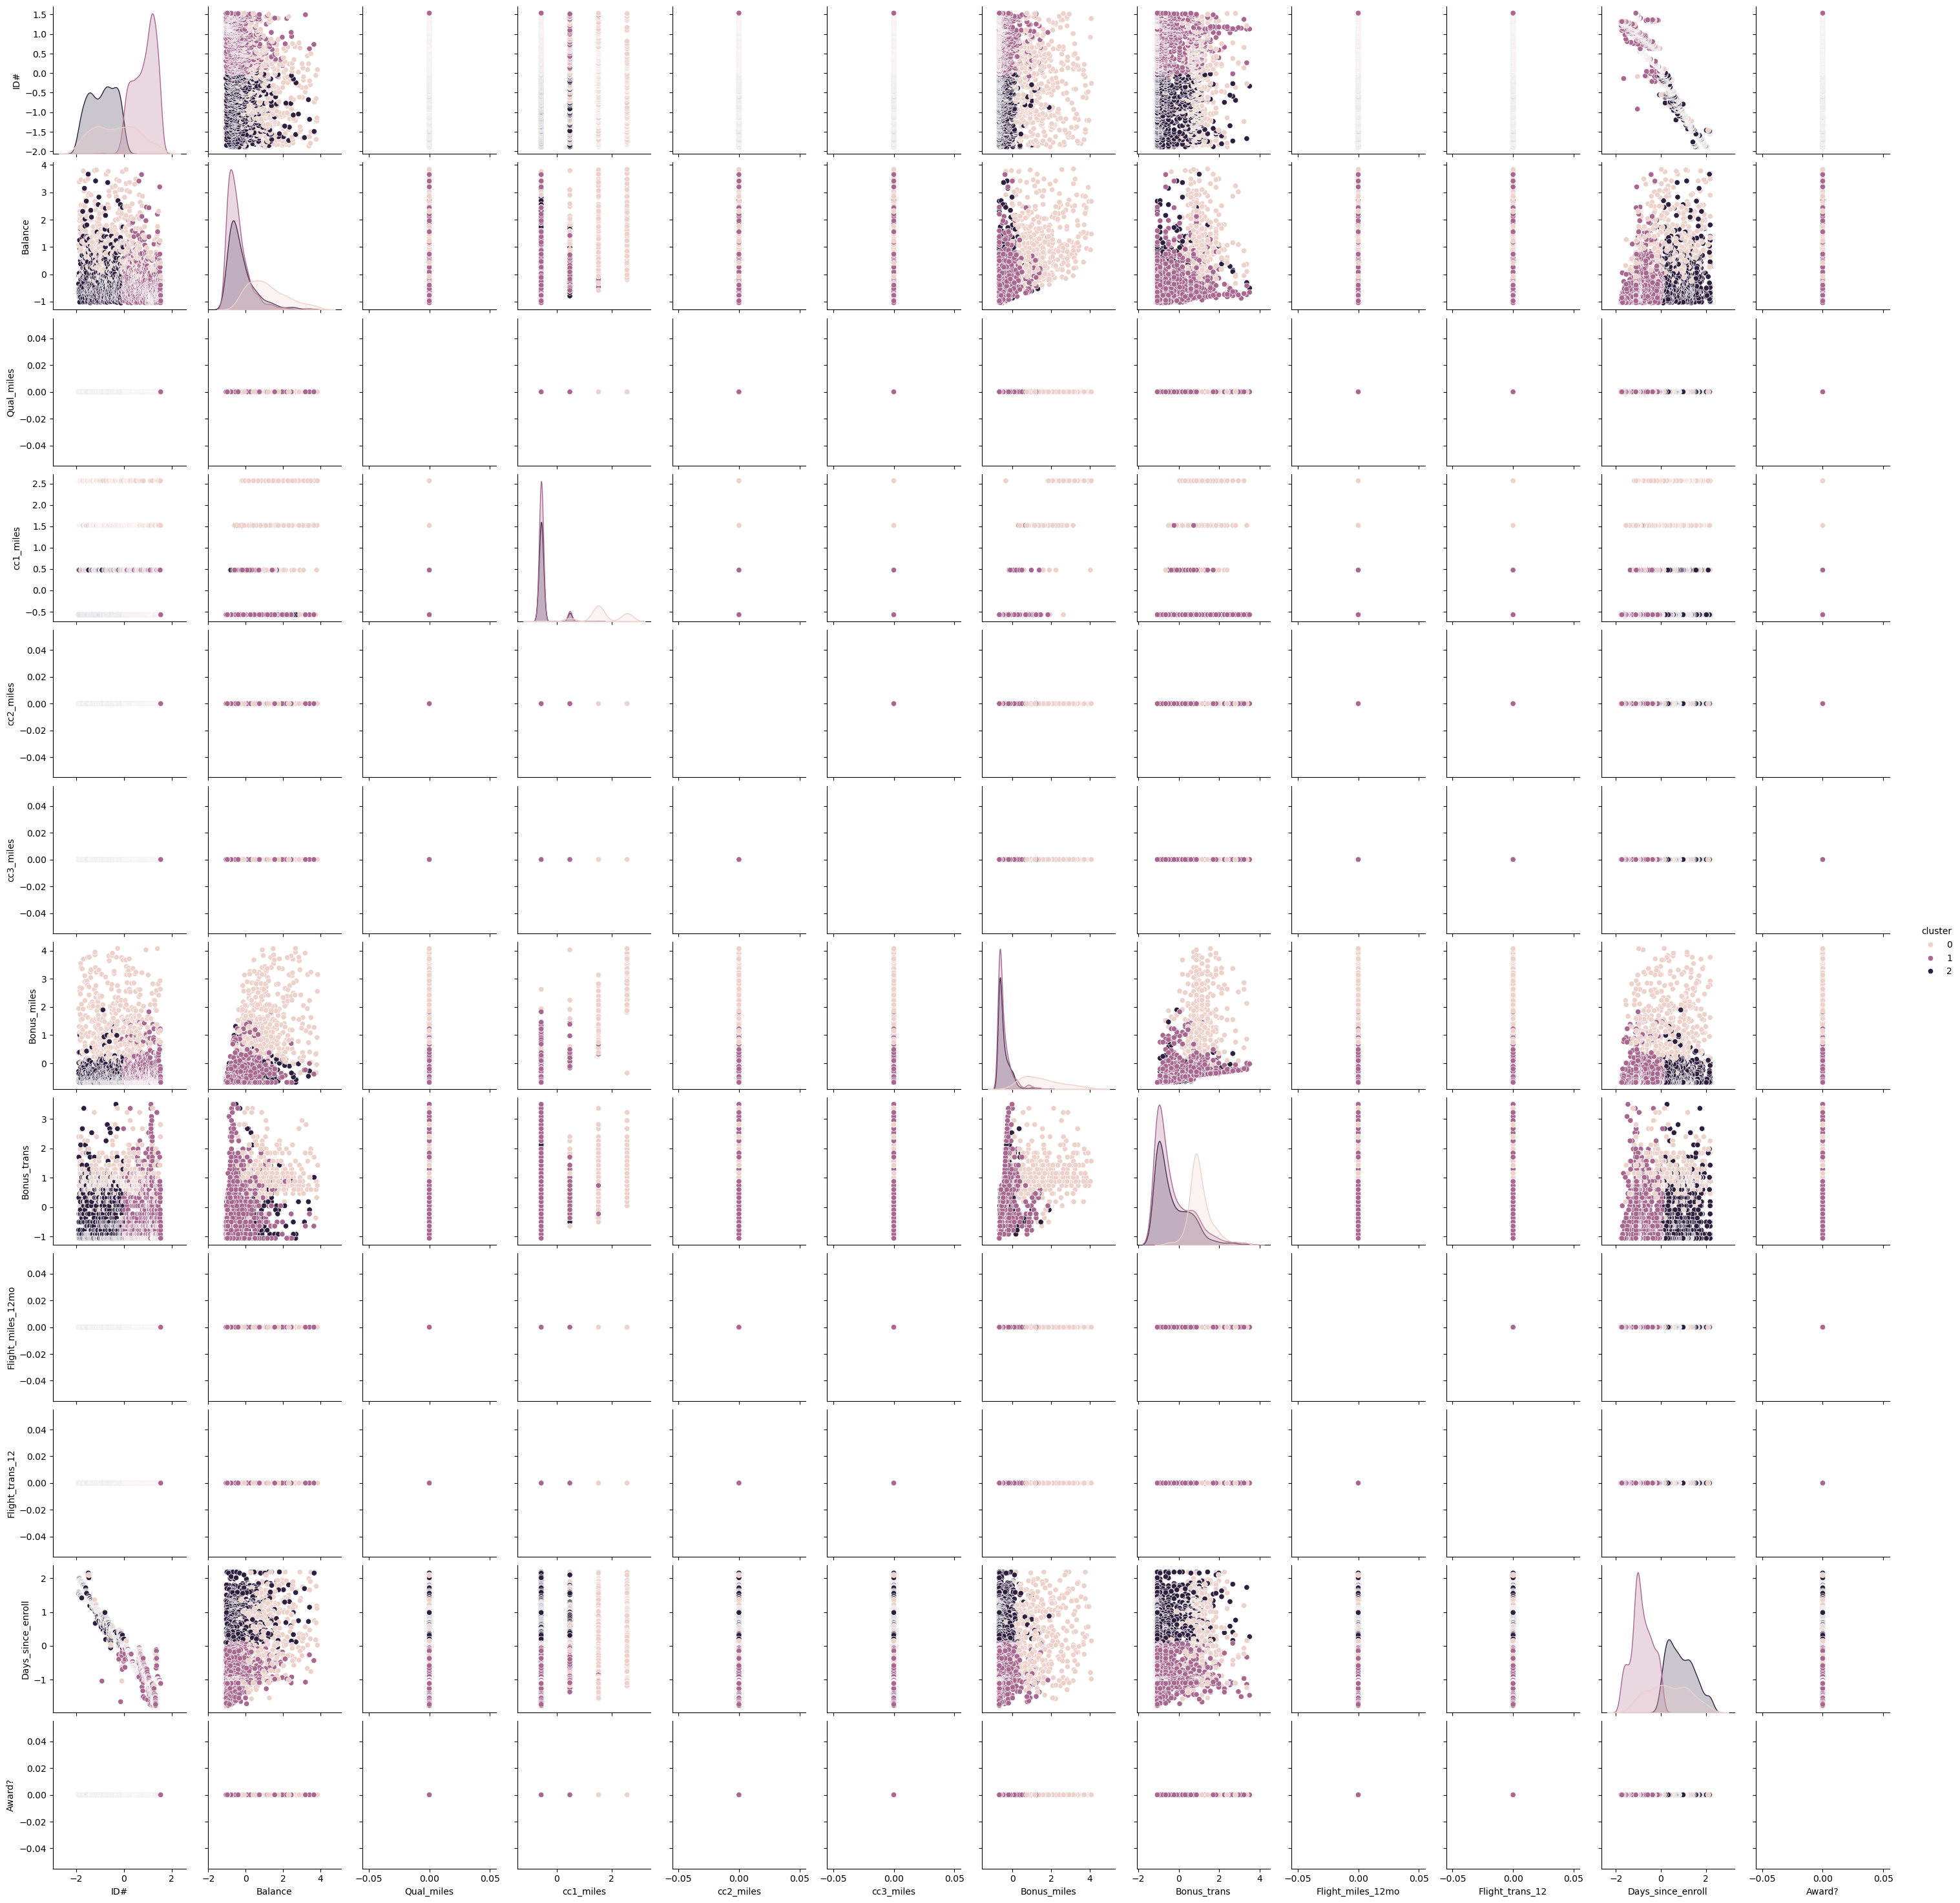

Not enough relevant features for 3D scatter plot.


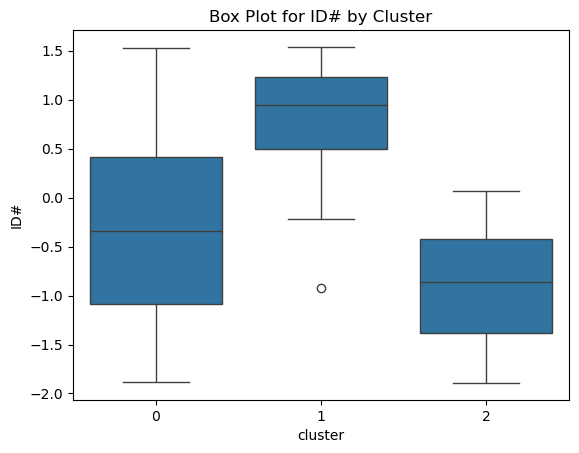

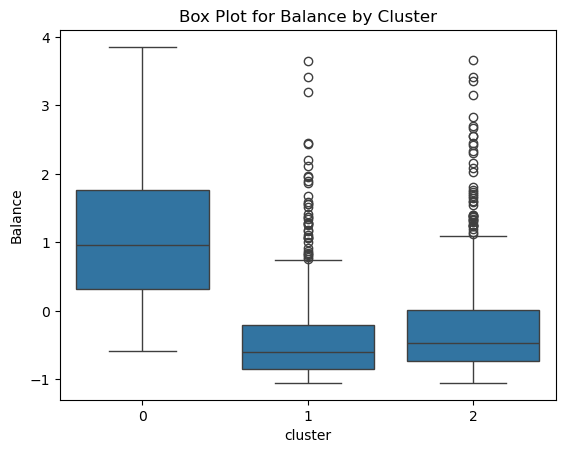

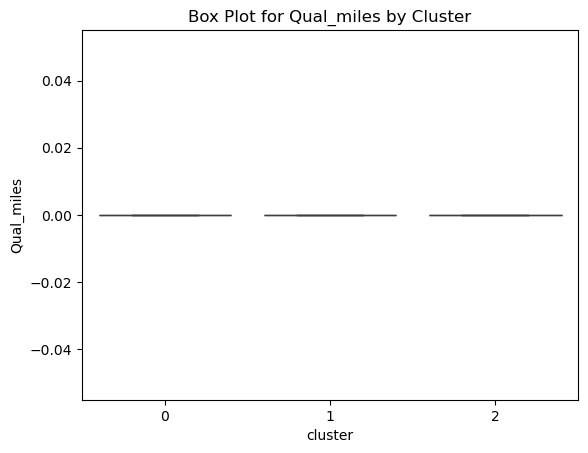

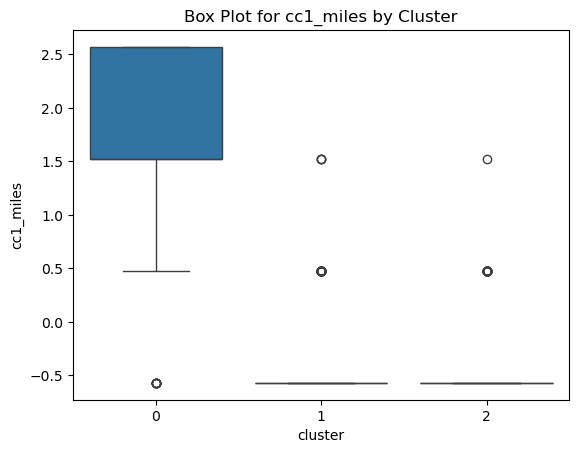

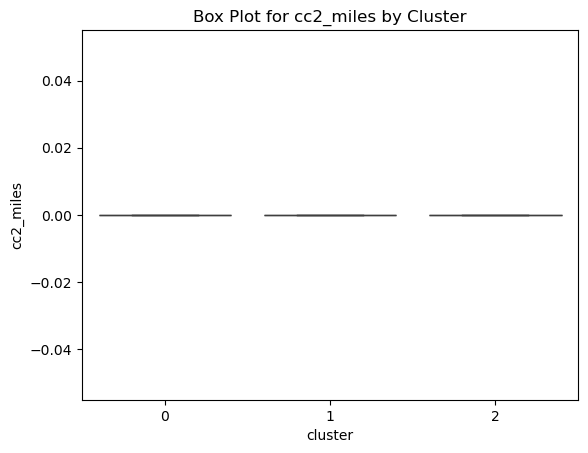

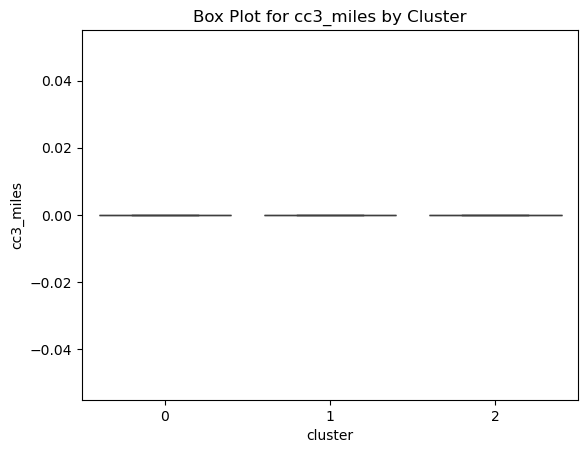

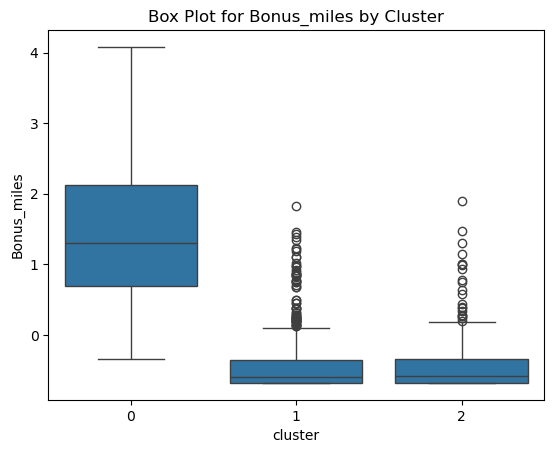

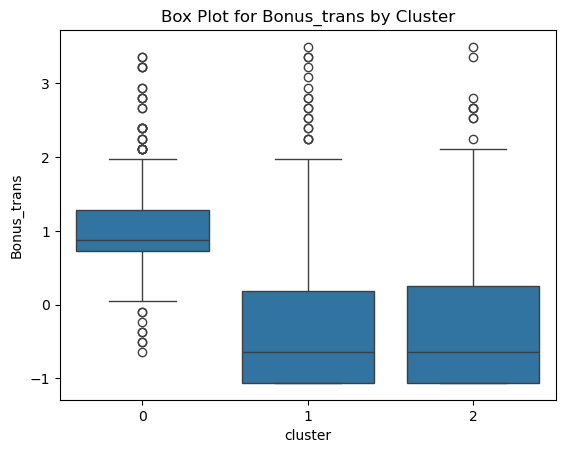

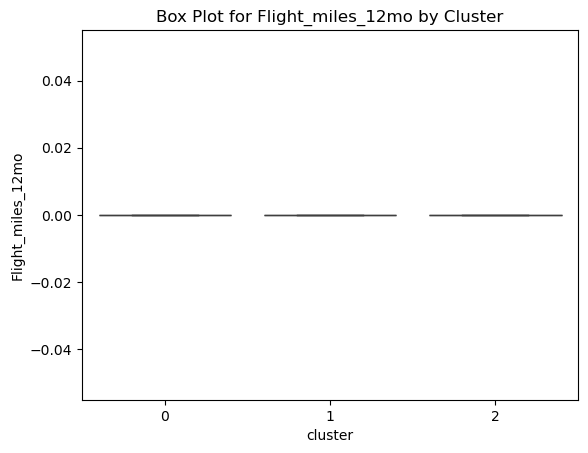

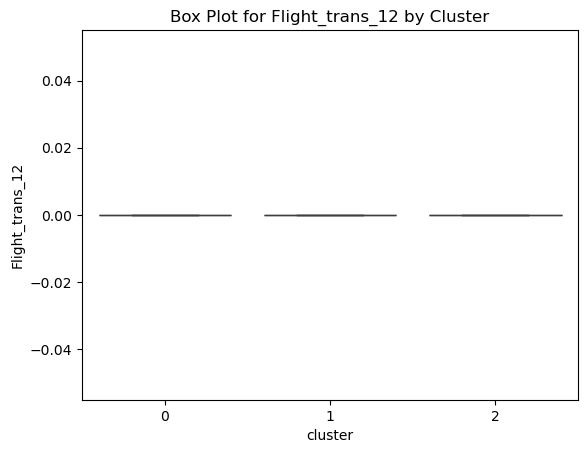

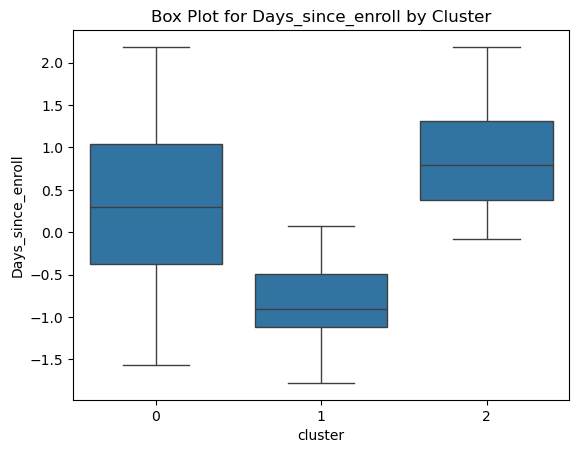

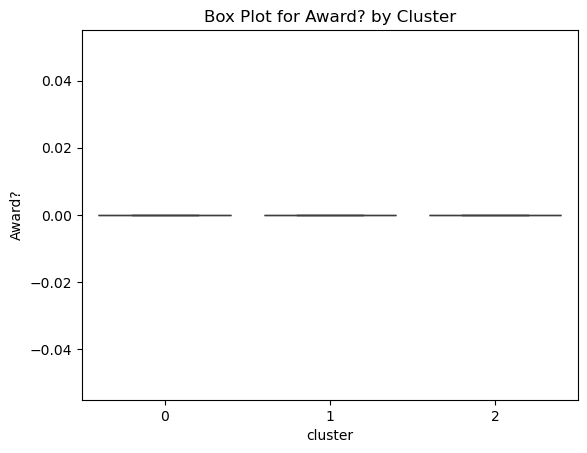

In [13]:
# 3.Use multiple visualizations to understand the hidden patterns in the dataset

import pandas as pd
import matplotlib.pyplot as plt
# Pair plot with clusters highlighted
sns.pairplot(df, hue='cluster')
plt.show()

# 3D scatter plot if you have more than 2 relevant features
from mpl_toolkits.mplot3d import Axes3D

if 'ActualElapsedTime' in df.columns and 'Distance' in df.columns and 'DepDelay' in df.columns:
  fig = plt.figure(figsize=(10, 8))
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(df['ActualElapsedTime'], df['Distance'], df['DepDelay'], c=df['cluster'], cmap='viridis')
  ax.set_xlabel('ActualElapsedTime')
  ax.set_ylabel('Distance')
  ax.set_zlabel('DepDelay')
  ax.set_title('3D Scatter Plot of Clusters')
  plt.show()
else:
  print("Not enough relevant features for 3D scatter plot.")

# Box plots for numerical features, grouped by cluster
for column in df.columns:
  if pd.api.types.is_numeric_dtype(df[column]) and column != 'cluster':
    plt.figure()
    sns.boxplot(x='cluster', y=column, data=df)
    plt.title(f'Box Plot for {column} by Cluster')
    plt.show()


# Bar plots for categorical features, grouped by cluster
for column in df.columns:
  if df[column].dtype == 'object':
    plt.figure()
    sns.countplot(x=column, hue='cluster', data=df)
    plt.title(f'Distribution of {column} by Cluster')
    plt.xticks(rotation=45, ha='right')
    plt.show()


In [15]:
#Implementing Clustering Algorithms:

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


# K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Choose optimal k based on elbow method
df['kmeans_cluster'] = kmeans.fit_predict(df)
kmeans_silhouette = silhouette_score(df, df['kmeans_cluster'])
print(f"K-Means Silhouette Score: {kmeans_silhouette}")

# Hierarchical clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)  # Choose optimal k
df['hierarchical_cluster'] = agg_clustering.fit_predict(df)
hierarchical_silhouette = silhouette_score(df, df['hierarchical_cluster'])
print(f"Hierarchical Silhouette Score: {hierarchical_silhouette}")

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed
df['dbscan_cluster'] = dbscan.fit_predict(df)
dbscan_silhouette = silhouette_score(df, df['dbscan_cluster'])
print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")

# Compare cluster results
print(df[['kmeans_cluster', 'hierarchical_cluster', 'dbscan_cluster']].head())

# Check for the existence of 'ActualElapsedTime' and 'Distance' columns
if 'ActualElapsedTime' in df.columns and 'Distance' in df.columns:
    # Visualize clusters (example with K-Means)
    plt.scatter(df['ActualElapsedTime'], df['Distance'], c=df['kmeans_cluster'], cmap='viridis')
    plt.xlabel('ActualElapsedTime')
    plt.ylabel('Distance')
    plt.title('K-Means Clusters')
    plt.show()
else:
    print("Columns 'ActualElapsedTime' or 'Distance' not found in the DataFrame.")


# Evaluate cluster quality using silhouette scores. 
# Higher scores indicate better-defined clusters.


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


K-Means Silhouette Score: 0.44191716546830584
Hierarchical Silhouette Score: 0.5082856953822228
DBSCAN Silhouette Score: 0.3688524880100402
   kmeans_cluster  hierarchical_cluster  dbscan_cluster
0               2                     2               0
1               2                     2               0
2               2                     2               0
3               2                     2               0
5               2                     2               0
Columns 'ActualElapsedTime' or 'Distance' not found in the DataFrame.


In [17]:
# 	Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.

# We have already applied K-Means, Hierarchical, and DBSCAN in the preceding code. 
# Here's a slightly more organized way to apply them together:

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

# K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Choose optimal k based on elbow method
df['kmeans_cluster'] = kmeans.fit_predict(df)
kmeans_silhouette = silhouette_score(df, df['kmeans_cluster'])
print(f"K-Means Silhouette Score: {kmeans_silhouette}")

# Hierarchical clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)  # Choose optimal k
df['hierarchical_cluster'] = agg_clustering.fit_predict(df)
hierarchical_silhouette = silhouette_score(df, df['hierarchical_cluster'])
print(f"Hierarchical Silhouette Score: {hierarchical_silhouette}")

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed
df['dbscan_cluster'] = dbscan.fit_predict(df)
dbscan_silhouette = silhouette_score(df, df['dbscan_cluster'])
print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")

# Compare cluster results
print(df[['kmeans_cluster', 'hierarchical_cluster', 'dbscan_cluster']].head())

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


K-Means Silhouette Score: 0.5790302259560982
Hierarchical Silhouette Score: 0.5581092651149908
DBSCAN Silhouette Score: 0.3740856816044377
   kmeans_cluster  hierarchical_cluster  dbscan_cluster
0               2                     2               0
1               2                     2               0
2               2                     2               0
3               2                     2               0
5               2                     2               0


Hierarchical Clustering (Linkage: ward) Silhouette Score: 0.5740745009285785
Hierarchical Clustering (Linkage: complete) Silhouette Score: 0.585429664456125
Hierarchical Clustering (Linkage: average) Silhouette Score: 0.585429664456125
Hierarchical Clustering (Linkage: single) Silhouette Score: 0.3551260986012744


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

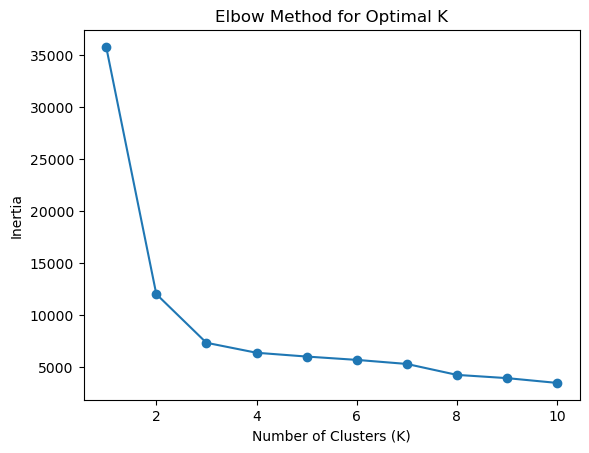

DBSCAN (eps=0.1, min_pts=5) Silhouette Score: 0.0264017660530378
DBSCAN (eps=0.1, min_pts=10) Silhouette Score: -0.0015036118394597807
DBSCAN (eps=0.1, min_pts=15) Silhouette Score: -0.006220072092031344
DBSCAN (eps=0.5, min_pts=5) Silhouette Score: 0.37985935926517567
DBSCAN (eps=0.5, min_pts=10) Silhouette Score: 0.2633860832736252
DBSCAN (eps=0.5, min_pts=15) Silhouette Score: 0.2011266751637692
DBSCAN (eps=1.0, min_pts=5) Silhouette Score: 0.3698300894858994
DBSCAN (eps=1.0, min_pts=10) Silhouette Score: 0.339956912140287
DBSCAN (eps=1.0, min_pts=15) Silhouette Score: 0.3006876912903982
DBSCAN (eps=1.5, min_pts=5) Silhouette Score: 0.3675737658990193
DBSCAN (eps=1.5, min_pts=10) Silhouette Score: 0.33632731828246
DBSCAN (eps=1.5, min_pts=15) Silhouette Score: 0.25656226383889835


In [21]:
# Experiment with different parameter settings for hierarchical clustering (e.g., linkage criteria), 
#K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Experiment with different linkage criteria for hierarchical clustering
linkage_criteria = ['ward', 'complete', 'average', 'single']
for linkage in linkage_criteria:
  agg_clustering = AgglomerativeClustering(n_clusters=3, linkage=linkage)
  df['hierarchical_cluster'] = agg_clustering.fit_predict(df)
  hierarchical_silhouette = silhouette_score(df, df['hierarchical_cluster'])
  print(f"Hierarchical Clustering (Linkage: {linkage}) Silhouette Score: {hierarchical_silhouette}")


# Experiment with different K values for K-Means clustering using the elbow method
inertia = []
for i in range(1, 11):  # Test K values from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

# Experiment with different epsilon and minPts values for DBSCAN clustering
eps_values = [0.1, 0.5, 1.0, 1.5]
min_pts_values = [5, 10, 15]

for eps in eps_values:
    for min_pts in min_pts_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_pts)
        df['dbscan_cluster'] = dbscan.fit_predict(df)

        # Check if any clusters were formed (excluding noise points)
        if len(set(df['dbscan_cluster'])) > 1:  # More than just noise points
            dbscan_silhouette = silhouette_score(df, df['dbscan_cluster'])
            print(f"DBSCAN (eps={eps}, min_pts={min_pts}) Silhouette Score: {dbscan_silhouette}")
        else:
            print(f"DBSCAN (eps={eps}, min_pts={min_pts}) No clusters formed.")

In [23]:
# 	Analyse the clusters generated by each clustering algorithm and interpret the 
#characteristics of each cluster. Write you insights in few comments.

# Analyze K-Means Clusters
for cluster in range(3):  # Assuming 3 clusters were formed
  print(f"K-Means Cluster {cluster}:")
  print(df[df['kmeans_cluster'] == cluster].describe())
  # Insight: Observe the mean, median, and other statistical properties of each K-Means cluster. Look for patterns and differences between clusters. For example, in a customer segmentation context, one cluster might represent high-spending customers, while another represents budget-conscious customers.


# Analyze Hierarchical Clusters
for cluster in range(3):  # Assuming 3 clusters were formed
  print(f"Hierarchical Cluster {cluster}:")
  print(df[df['hierarchical_cluster'] == cluster].describe())
  # Insight: Similarly, analyze the characteristics of each hierarchical cluster. Look for patterns in the features within each cluster. For instance, you might notice that one hierarchical cluster has a higher average travel distance than the others.


# Analyze DBSCAN Clusters
for cluster in range(len(set(df['dbscan_cluster']))):  # Iterate through unique clusters (excluding noise)
  print(f"DBSCAN Cluster {cluster}:")
  print(df[df['dbscan_cluster'] == cluster].describe())
  # Insight: DBSCAN might form clusters of varying sizes and densities. Analyze the features of each DBSCAN cluster and identify any patterns or differences. For example, you might discover that one DBSCAN cluster contains frequent travelers while another contains infrequent travelers.


# Compare Cluster Results
# Compare the characteristics of clusters formed by different algorithms.
# Do the algorithms identify similar groups of data points?
# Are there any significant differences in how the algorithms group the data?
# Insight: The differences in the clusters created by each algorithm may reveal different underlying patterns in the dataset. Consider whether one algorithm's clusters are more meaningful or interpretable based on your business objectives or analysis goals.


# Visualize Cluster Characteristics
# Create visualizations (e.g., box plots, histograms) of specific features for each cluster.
# For example, compare the distribution of the 'ActualElapsedTime' feature for each cluster.
# Insight: Visual comparisons of features can reveal insights into the distinctiveness of each cluster. For instance, you might find that certain features have a greater spread within one cluster than another, indicating a larger variation in that specific feature for that group.


# Overall Interpretation
# Based on the analysis of each cluster, draw conclusions about the data and answer your original research questions.
# For example, if you were conducting customer segmentation, you might conclude that customers in Cluster 1 are high-value customers with higher spending and longer flight durations.
# Insight: Summarize the findings and discuss how the clusters help in understanding the data, driving decisions, or further research. For instance, you might use the cluster findings to create tailored marketing campaigns or understand customer behavior better.



K-Means Cluster 0:
              ID#     Balance  Qual_miles   cc1_miles  cc2_miles  cc3_miles  \
count  477.000000  477.000000       477.0  477.000000      477.0      477.0   
mean    -0.120206    1.024021         0.0    1.283369        0.0        0.0   
std      0.979709    1.053383         0.0    1.038206        0.0        0.0   
min     -1.886965   -0.782158         0.0   -0.571271        0.0        0.0   
25%     -1.005801    0.193390         0.0    0.475668        0.0        0.0   
50%     -0.033365    0.826334         0.0    1.522607        0.0        0.0   
75%      0.651606    1.666704         0.0    1.522607        0.0        0.0   
max      1.531064    3.854582         0.0    2.569546        0.0        0.0   

       Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count   477.000000   477.000000              477.0            477.0   
mean      1.245073     0.929939                0.0              0.0   
std       1.120636     0.732831                0.0      

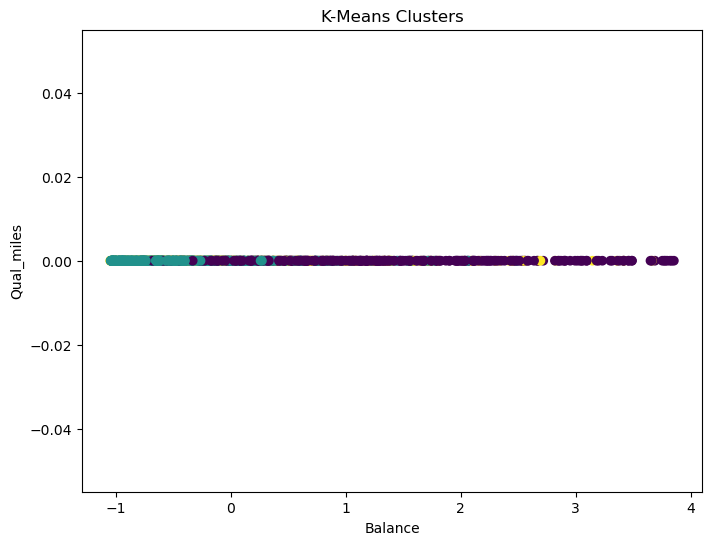

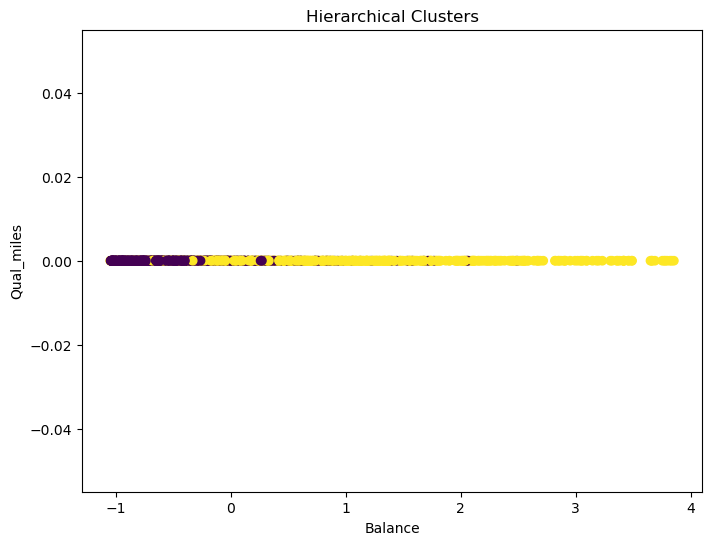

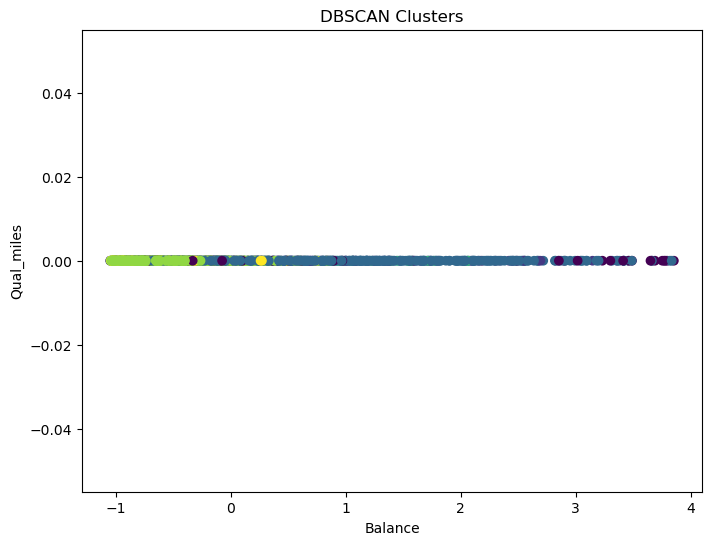

In [25]:
#Visualize the clustering results using scatter plots 
#Plot the clusters with different colours to visualize the separation of data points belonging to different clusters.
import matplotlib.pyplot as plt

# Assuming you have 'kmeans_cluster', 'hierarchical_cluster', and 'dbscan_cluster' 
# columns in your DataFrame 'df' and want to visualize clusters based on 'Balance' and 'Qual_miles'

# Visualize K-Means clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['Balance'], df['Qual_miles'], c=df['kmeans_cluster'], cmap='viridis')
plt.xlabel('Balance')
plt.ylabel('Qual_miles')
plt.title('K-Means Clusters')
plt.show()

# Visualize Hierarchical clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['Balance'], df['Qual_miles'], c=df['hierarchical_cluster'], cmap='viridis')
plt.xlabel('Balance')
plt.ylabel('Qual_miles')
plt.title('Hierarchical Clusters')
plt.show()

# Visualize DBSCAN clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['Balance'], df['Qual_miles'], c=df['dbscan_cluster'], cmap='viridis')
plt.xlabel('Balance')
plt.ylabel('Qual_miles')
plt.title('DBSCAN Clusters')
plt.show()

In [27]:
#Evaluation and Performance Metrics:
#Evaluate the quality of clustering using internal evaluation metrics such as silhouette score for K-Means and DBSCAN.
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score for K-Means
kmeans_silhouette = silhouette_score(df, df['kmeans_cluster'])
print(f"K-Means Silhouette Score: {kmeans_silhouette}")

# Calculate Silhouette Score for DBSCAN
# Check if any clusters were formed (excluding noise points which are labeled as -1)
if len(set(df['dbscan_cluster'])) > 1:
  dbscan_silhouette = silhouette_score(df, df['dbscan_cluster'])
  print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")
else:
  print("DBSCAN: No clusters formed or only noise points.")


K-Means Silhouette Score: 0.5434726622283161
DBSCAN Silhouette Score: 0.25656226383889835
